Abhinav Malik

## Research question/interests



**What is the relationship between body mass index (BMI) and smoking status and their impact on an individual's medical expenses in the United States?**


I plan on analyzing the impact of body mass index (BMI) and smoking status on medical expenses in the US using the Medical Cost Personal Datasets from Kaggle. The analysis will involve cleaning and pre-processing the data, exploring the relationship between the variables using descriptive statistics and data visualization, running regression models to quantify the relationship, and performing subgroup analysis to identify demographic differences. The findings will shed light on the importance of prevention and early intervention in reducing healthcare costs associated with obesity and smoking.


**Does smoking status affect medical expenses in the United States, and how does this relationship differ by age, sex, and region?**


The relationship between smoking status and medical expenses in the United States is an important area of research. By examining this relationship, we can identify the costs associated with smoking and develop effective strategies for reducing them. To investigate this topic, I plan to use the Medical Cost Personal Datasets from Kaggle and analyze the data using regression models and subgroup analysis to identify how the relationship between smoking status and medical expenses varies by age, sex, and region. The results will provide insights into the effectiveness of smoking cessation programs and the importance of promoting healthy behaviors to reduce healthcare costs.

**What is the most significant factor contributing to healthcare costs in the United States, and how does this vary by region, gender, age, BMI, smoking status, and number of children?**

Understanding the most significant factors that contribute to healthcare costs in the United States is critical for policymakers and healthcare professionals to develop effective strategies for managing healthcare costs and improving patient outcomes. By examining how healthcare costs vary by region, gender, age, BMI, smoking status, and number of children, we can gain insights into the underlying causes of healthcare expenses and identify areas for improvement in the healthcare system. This information can also help policymakers design targeted interventions that address the unique needs of different populations.The analysis will involve examining the relationships between healthcare costs and demographic factors using descriptive statistics and data visualization, running regression models to quantify the relative contributions of different factors, and performing subgroup analysis to identify regional and demographic differences.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

dataframe = pd.read_csv('../data/raw/Medical_Cost.csv')
plt.style.use('ggplot')
sns.set_style('darkgrid')

## Basic/General EDA
Here I am doing some basic EDA just to give a glimpse of my dataframe

#### **Four Scatterplots divided based on their smoking status and sex showing relationship between BMI and Charges by Region**

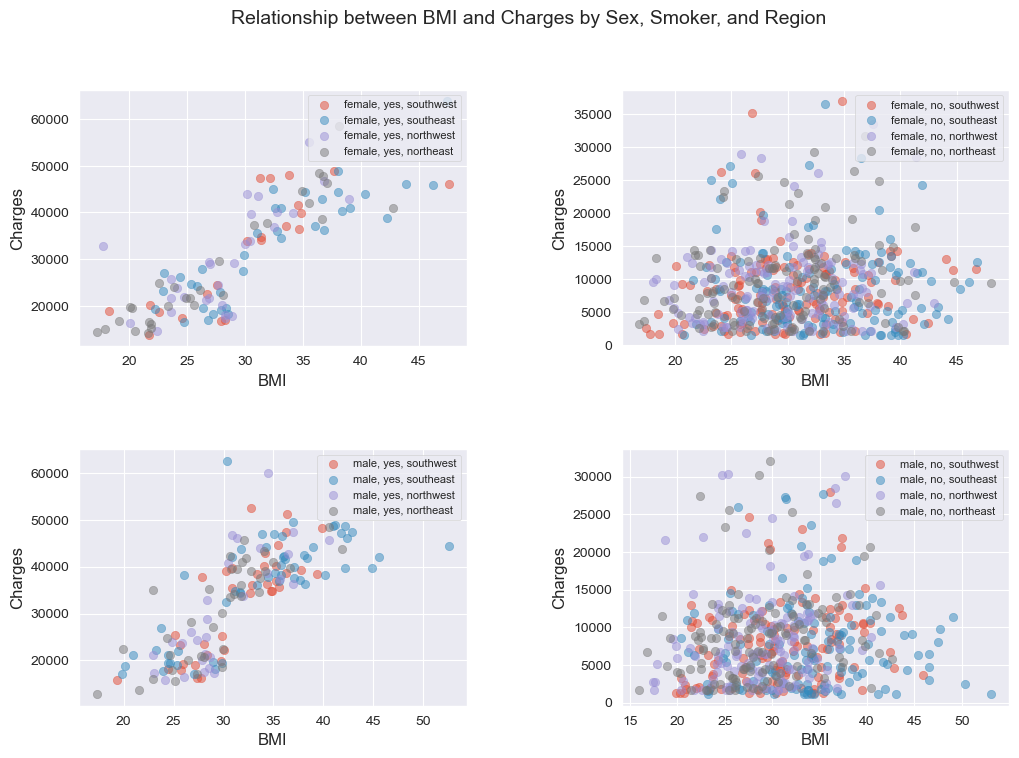

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()
sexes = dataframe["sex"].unique()
smokers = dataframe["smoker"].unique()
regions = dataframe["region"].unique()

for i, sex in enumerate(sexes):
    for j, smoker in enumerate(smokers):
        for k, region in enumerate(regions):
            subset = dataframe[(dataframe["sex"] == sex) & (dataframe["smoker"] == smoker) & (dataframe["region"] == region)]
            axs[i*2+j].scatter(subset["bmi"], subset["charges"], alpha=0.5, label=f"{sex}, {smoker}, {region}")
            axs[i*2+j].set_xlabel("BMI")
            axs[i*2+j].set_ylabel("Charges")
            axs[i*2+j].legend(loc="upper right", fontsize=8)

fig.subplots_adjust(hspace=0.4, wspace=0.4)

fig.suptitle("Relationship between BMI and Charges by Sex, Smoker, and Region", fontsize=14)
plt.show()


The graph shows the relationship between BMI and medical charges by sex, smoking status, and region. It can be observed that in general, as BMI increases, medical charges also tend to increase.
There is a noticeable difference in the relationship between BMI and medical charges for different subgroups. For example, for non-smokers, the relationship between BMI and medical charges appears to be relatively weak, while for smokers, the relationship appears to be stronger. This suggests that smoking status may be an important factor to consider when examining the relationship between BMI and medical charges.
The graph also shows that the relationship between BMI and medical charges varies by region. For example, for females who smoke, the relationship between BMI and medical charges appears to be stronger in the southeast region compared to the northeast region. This suggests that regional differences may play a role in the relationship between BMI and medical charges.

#### **Scatterplot showing relationship between BMI, Smoking Status, and Medical Expenses**

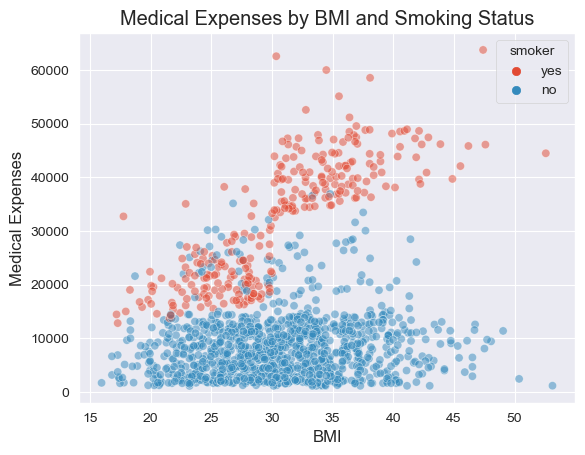

In [75]:
sns.scatterplot(data=dataframe, x='bmi', y='charges', hue='smoker', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Medical Expenses')
plt.title('Medical Expenses by BMI and Smoking Status')
plt.show()

The scatterplot shows the relationship between BMI, medical expenses, and smoking status. The plot is divided into two groups by the smoker variable, indicated by the color. The graph shows a clear positive correlation between BMI and medical expenses, as expected. Additionally, the scatterplot indicates that smokers have higher medical expenses than non-smokers, and this difference becomes more pronounced as BMI increases. This graph highlights the importance of controlling BMI and avoiding smoking to minimize healthcare expenses.

#### **Distribution of BMI by Smoking Status showen through a stacked histogram**

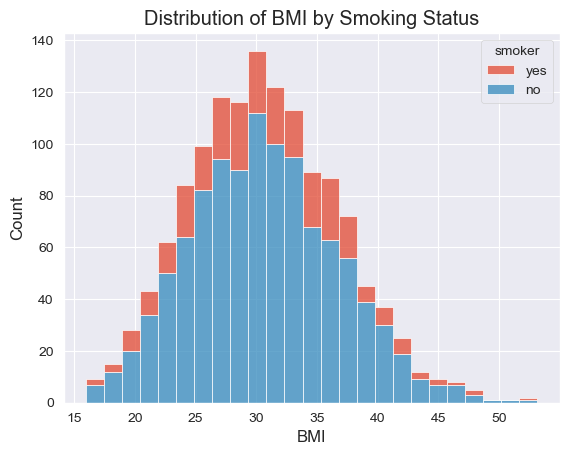

In [ ]:
sns.histplot(data=dataframe, x='bmi', hue='smoker', multiple='stack')
plt.title('Distribution of BMI by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

The above graph is a stacked histogram that shows the distribution of BMI (body mass index) for smokers and non-smokers in the dataset. The x-axis represents BMI values, while the y-axis represents the count of individuals falling in each BMI bin. The graph shows that non-smokers have a slightly higher proportion of individuals with a healthy BMI range, while smokers have a higher proportion of individuals in the overweight and obese BMI range.

#### **Correlation Matrix for Numerical Variables in Insurance Dataset**

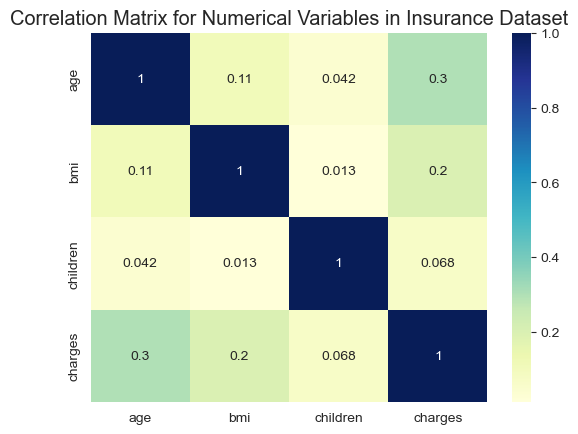

In [77]:
numerical_cols = ["age", "bmi", "children", "charges"]
corr_matrix = dataframe[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix for Numerical Variables in Insurance Dataset")
plt.show()

The above code generates a heatmap visualization of the correlation matrix between the numerical variables age, BMI, children, and charges in the insurance dataset. The heatmap shows the strength and direction of the linear relationship between each pair of variables, with higher correlation values represented by darker shades of blue.

#### **Trend of Charges over Age in the Medical Cost Dataset showen through a line graph**

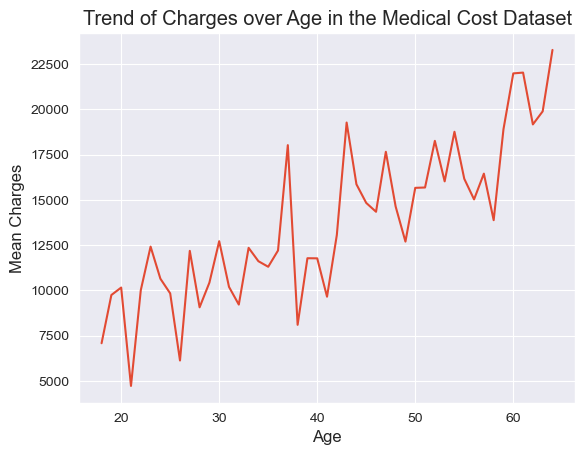

In [78]:
age_grouped = dataframe.groupby("age")["charges"].mean()

plt.plot(age_grouped.index, age_grouped.values)

plt.xlabel("Age")
plt.ylabel("Mean Charges")
plt.title("Trend of Charges over Age in the Medical Cost Dataset")
plt.show()

This is a line graph showing the trend of average medical charges over age. As age increases, the average medical charges tend to increase as well. The graph shows a gradual increase in charges until around age 60, after which the increase becomes steeper. This may indicate that older individuals tend to have higher medical costs due to age-related health issues.

# Cleaning Data
To clean the data, I will start by checking for duplicates using the duplicated() function from pandas. If any duplicates are found, I will drop them using the drop_duplicates() function. Next, I will check for missing values using the isnull() function and drop any rows that contain them using dropna(). This will ensure that the dataset is clean and ready for analysis.

In [6]:
print(f"Number of duplicates: {dataframe.duplicated().sum()}")
dataframe.drop_duplicates(inplace=True)

Number of duplicates: 1


In [7]:
print(f"Number of missing values:\n{dataframe.isnull().sum()}")
dataframe.dropna(inplace=True)

Number of missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


This shows that now there are no missing values in the dataset now.

#### Checking for Outliers

Checking for outliers is an important step in data cleaning to identify and remove any extreme values that can significantly affect the analysis. In this case, a box plot is used to visualize the distribution of the BMI variable in the insurance dataset, which can help identify any outliers.

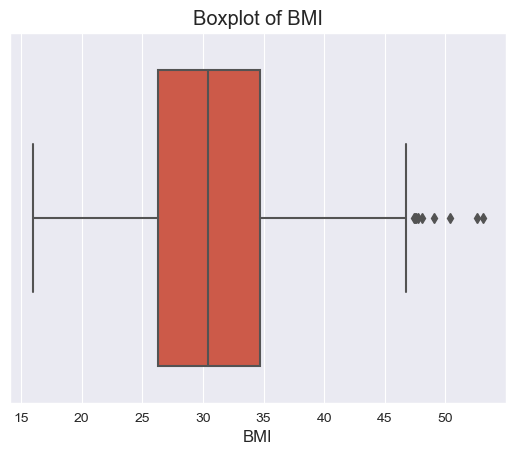

In [81]:
sns.boxplot(data=dataframe, x='bmi')
plt.xlabel('BMI')
plt.title('Boxplot of BMI')
plt.show()

q1 = dataframe['bmi'].quantile(0.25)
q3 = dataframe['bmi'].quantile(0.75)
iqr = q3 - q1
dataframe = dataframe[(dataframe['bmi'] > q1 - 1.5 * iqr) & (dataframe['bmi'] < q3 + 1.5 * iqr)]


After visualizing the box plot, we can see that there are some outliers in the data. To deal with these outliers, we can use the Interquartile Range (IQR) method. In this case, we calculate the IQR of the BMI variable and remove any data point that is outside of 1.5 times the IQR from the upper and lower quartiles. The code then removes these outliers from the dataset.

## Processing Data

In the processing data step, we are creating two new columns in the dataframe. The first column 'bmi_category' is created by categorizing the 'bmi' values into four groups: underweight, normal, overweight, and obese. This is done by defining bins for the bmi values and then using the 'pd.cut' function to categorize the values into the defined bins. The second column 'age_group' is created by categorizing the 'age' values into five groups: <18, 18-30, 30-45, 45-60, and 60+. This is also done by defining bins for the age values and using the 'pd.cut' function to categorize the values into the defined bins. These new columns will help us in the analysis and visualization of the data.

In [82]:
bins = [0, 18.5, 25, 30, 100]
labels = ['underweight', 'normal', 'overweight', 'obese']
dataframe['bmi_category'] = pd.cut(dataframe['bmi'], bins=bins, labels=labels)


In [ ]:
bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-30', '30-45', '45-60', '60+']
dataframe['age_group'] = pd.cut(dataframe['age'], bins=bins, labels=labels)


The same thing that we did above can be done with just a function. I am adding the code for calling the function below as a comment so if someone wants to remove the above steps and make the analysis look better and cleaner, they can just delete the # symbol and run the code

In [9]:
#add_age_and_bmi_categories(dataframe)

## Data Wrangling

Under the section of Data Wrangling, we are performing geographical data wrangling on the dataset. Here I have defined a dictionary region_coords containing latitude and longitude values for each region. Then, we have used the apply function on the region column to extract the latitude and longitude values for each row based on the corresponding region from the dictionary. Finally, we have added two new columns latitude and longitude to the dataset and saved the processed dataset as a new CSV file named "procesed_medicalCost_AbhinavMalik.csv" using the to_csv function.

In [84]:
region_coords = {"northeast": (42.246163,-73.856465), 
                 "northwest": (47.037874,-121.695988), 
                 "southeast": (31.243618,-84.256385), 
                 "southwest": (34.739734,-106.693466)}

In [85]:
dataframe["latitude"] = dataframe["region"].apply(lambda x: region_coords[x][0])
dataframe["longitude"] = dataframe["region"].apply(lambda x: region_coords[x][1])

In [ ]:
dataframe['smoking_status'] = dataframe['smoker'].apply(lambda x: True if x == 'yes' else False)

In [87]:
dataframe.to_csv("procesed_medicalCost_AbhinavMalik.csv", index=False)

The same thing that we did above can be done with just a function. I am adding the code for calling the function below as a comment so if someone wants to remove the above steps and make the analysis look better and cleaner, they can just delete the # symbol and run the code

In [ ]:
#data_wrangling(dataframe)


## Method Chaining 

**The following code loads and processes a medical cost dataset from a given CSV file URL or file path, and returns a restructured and melted DataFrame with at least three advanced operations using anonymous or lambda functions in the assign or apply functions**

In [10]:
import pandas as pd

def load_and_process(url_or_path_to_csv_file):
    
    # Method chain 1: Load data and drop unused columns
    df = (
        pd.read_csv(url_or_path_to_csv_file)
        .drop(['charges'], axis=1)
    )
    
    # Method chain 2: Clean data
    df = (
        df
        .dropna()
        .reset_index(drop=True)
        .assign(age=lambda x: round(x['age'])) # advanced operation 1: round age to nearest integer
    )
    
    # Method chain 3: Process data
    df = (
        df
        .assign(is_smoker=df['smoker'].map({'yes': True, 'no': False})) # advanced operation 2: map smoker column to boolean
        .drop(['smoker'], axis=1)
        .assign(age_group=pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '18-35', '35-50', '50-65', '65+']))
        .assign(bmi_category=lambda x: pd.cut(x['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['underweight', 'normal', 'overweight', 'obese'])) # advanced operation 3: categorize BMI
    )
    
    # Method chain 4: Restructure data format
    df = (
        df
        .melt(id_vars=['age', 'sex', 'bmi', 'is_smoker', 'age_group', 'bmi_category'], var_name='variable', value_name='value')
    )
    
    return df


The above function can be removed from the analysis, as this function is saved in the python function file and can be used from there too. Below I have added the code as a comment which can be turned into functional code if someone removes the # symbol

In [38]:
#load_and_process('../data/raw/Medical_Cost.csv')

**The insurance_eda function performs an exploratory data analysis on the dataframe parameter, which is assumed to be a Pandas DataFrame containing information on medical insurance charges. The function produces several plots using the Matplotlib and Seaborn libraries.**

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

def insurance_eda(dataframe):
    # Relationship between BMI and Charges by Sex, Smoker, and Region
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    axs = axs.flatten()
    sexes = dataframe["sex"].unique()
    smokers = dataframe["smoker"].unique()
    regions = dataframe["region"].unique()

    for i, sex in enumerate(sexes):
        for j, smoker in enumerate(smokers):
            for k, region in enumerate(regions):
                subset = dataframe[(dataframe["sex"] == sex) & (dataframe["smoker"] == smoker) & (dataframe["region"] == region)]
                sns.scatterplot(x="bmi", y="charges", hue="smoker", data=subset, ax=axs[i*2+j], alpha=0.5)
                axs[i*2+j].set_title(f"{sex}, {smoker}, {region}")
                axs[i*2+j].set_xlabel("BMI")
                axs[i*2+j].set_ylabel("Charges")

    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    fig.suptitle("Relationship between BMI and Charges by Sex, Smoker, and Region", fontsize=14)
    plt.show()

    # Medical Expenses by BMI and Smoking Status
    sns.scatterplot(data=dataframe, x='bmi', y='charges', hue='smoker', alpha=0.5)
    plt.xlabel('BMI')
    plt.ylabel('Medical Expenses')
    plt.title('Medical Expenses by BMI and Smoking Status')
    plt.show()

    # Distribution of BMI by Smoking Status
    sns.histplot(data=dataframe, x='bmi', hue='smoker', multiple='stack')
    plt.title('Distribution of BMI by Smoking Status')
    plt.xlabel('BMI')
    plt.ylabel('Count')
    plt.show()

    # Correlation Matrix for Numerical Variables in Insurance Dataset
    numerical_cols = ["age", "bmi", "children", "charges"]
    corr_matrix = dataframe[numerical_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
    plt.title("Correlation Matrix for Numerical Variables in Insurance Dataset")
    plt.show()

    # Trend of Charges over Age in the Medical Cost Dataset
    age_grouped = dataframe.groupby("age")["charges"].mean()
    plt.plot(age_grouped.index, age_grouped.values)
    plt.xlabel("Age")
    plt.ylabel("Mean Charges")
    plt.title("Trend of Charges over Age in the Medical Cost Dataset")
    plt.show()
